In [1]:
import pandas as pd

In [55]:
df=pd.read_csv("/content/drive/My Drive/Dataset.csv")

In [3]:
df.head(5)

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,lobular,spiculated,low,1
1,4.0,43.0,round,circumscribed,NaN,1
2,5.0,58.0,irregular,spiculated,low,1
3,4.0,28.0,round,circumscribed,low,0
4,5.0,74.0,round,spiculated,NaN,1


In [15]:
df.tail(5)

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
956,4.0,47.0,oval,circumscribed,low,0
957,4.0,56.0,irregular,spiculated,low,1
958,4.0,64.0,irregular,spiculated,low,0
959,5.0,66.0,irregular,spiculated,low,1
960,4.0,62.0,lobular,obscured,low,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       959 non-null    float64
 1   Age           861 non-null    float64
 2   Shape         930 non-null    object 
 3   Margin        913 non-null    object 
 4   Mass_Density  885 non-null    object 
 5   Severity      961 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 45.2+ KB


In [5]:
df.describe()

,BI_RADS,Age,Severity
count,959.000000,861.000000,961.000000
mean,4.348279,55.860627,0.463059
std,1.783031,16.969647,0.498893
min,0.000000,5.000000,0.000000
25%,4.000000,45.000000,0.000000
50%,4.000000,56.000000,0.000000
75%,5.000000,66.000000,1.000000
max,55.000000,130.000000,1.000000


In [8]:
#missing amount for data
missing= df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)
missing_recommend_df = pd.concat([missing, percentage], axis=1, keys=['Missing_count', 'Missinng_%'])
missing_recommend_df.head(6)

,Missing_count,Missinng_%
Age,100,0.104058
Mass_Density,76,0.079084
Margin,48,0.049948
Shape,31,0.032258
BI_RADS,2,0.002081
Severity,0,0.000000


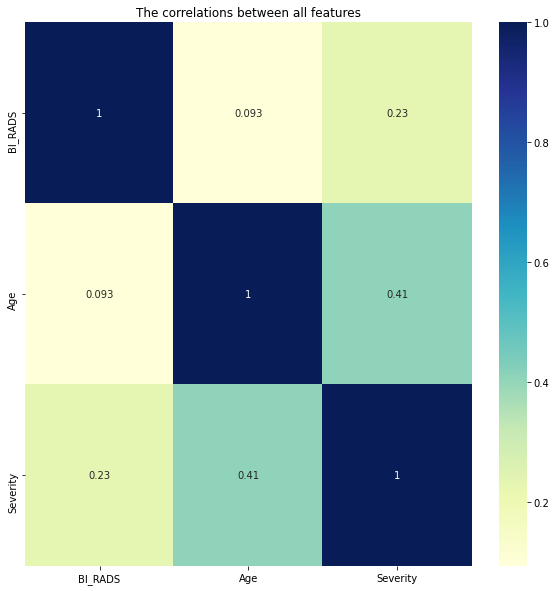

In [12]:
#check corelation 
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True,ax=ax, cmap=plt.cm.YlGnBu)
ax.set_title('The correlations between all features')
palette =sns.diverging_palette(80, 110, n=146)
plt.show()

In [13]:
# correlation with the target
corr_matrix = df.corr()
corr_matrix["Severity"].sort_values(ascending=False)

Severity    1.000000
Age         0.408413
BI_RADS     0.231601
Name: Severity, dtype: float64

In [14]:
df['Severity'].value_counts(normalize=True)

0    0.536941
1    0.463059
Name: Severity, dtype: float64

In [ ]:
#lets plot feature wise

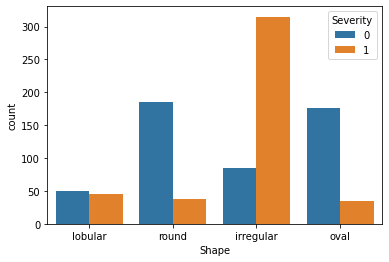

In [19]:
sns.countplot(x='Shape', hue='Severity', data=df)

In [18]:
#from above it looks the irregular shape has more severity 

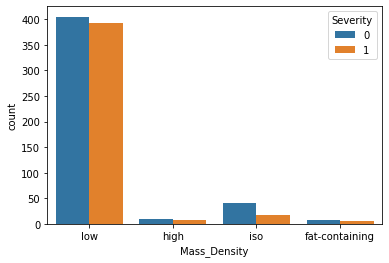

In [20]:
sns.countplot(x='Mass_Density', hue='Severity', data=df);

In [21]:
#Mass_Density seems quite normally distributed for both cases ,except for iso type .

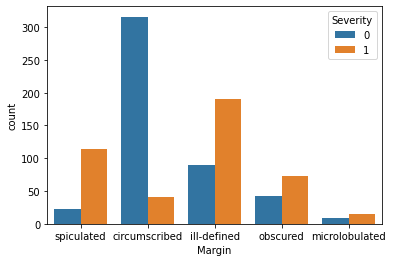

In [23]:
sns.countplot(x='Margin', hue='Severity', data=df);

In [24]:
#High severity cases for spiculated, ill defined Margin

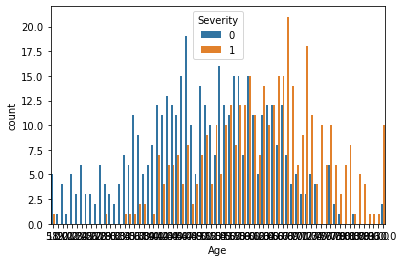

In [29]:
sns.countplot(x='Age', hue='Severity', data=df);

seems more severity toward high age groups

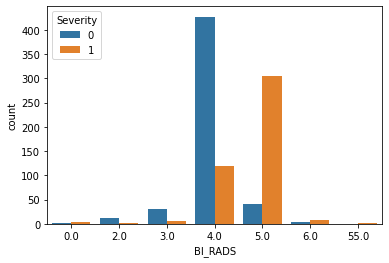

In [32]:
sns.countplot(x='BI_RADS', hue='Severity', data=df);

BI_RADS type 5  are more severe types

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


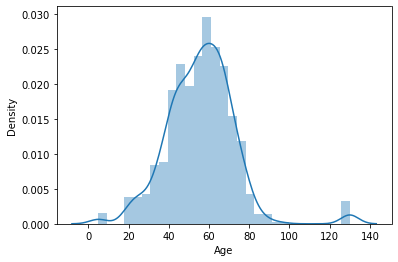

In [33]:
##Lets check data distributions
sns.distplot(df['Age'])

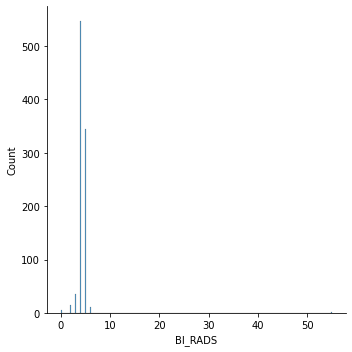

In [35]:
sns.displot(df, x="BI_RADS")

In [36]:
#lets do impute missing data and go for classification

In [ ]:
# Shape,	Margin,	Mass_Density are categorical type
#BI_RADS and Age  numerics

In [56]:
df['BI_RADS'] = df['BI_RADS'].fillna(df['BI_RADS'].mode()[0])

In [57]:
df['BI_RADS'].isnull().sum()

0

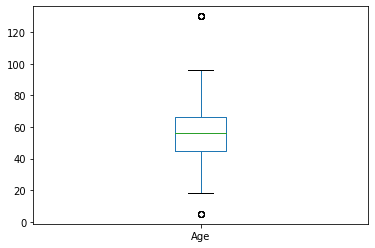

In [42]:
#FOR AGE ,  there seems some outliers , lets fix that and impute
df['Age'].plot(kind='box')
plt.show()


there are some circles below 20 and above 100 

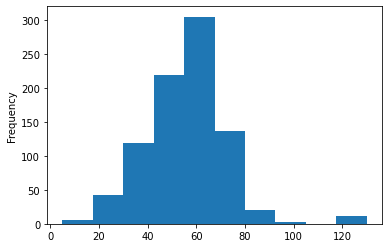

In [43]:
df['Age'].plot(kind='hist')
plt.show()

In [49]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

13.5
97.5


In [59]:
df.loc[df['Age'] > Upper_Fence, 'Age'] = np.nan

In [60]:
df.loc[df['Age'] < Lower_Fence, 'Age'] = np.nan

In [61]:
df['Age'].isnull().sum()

118

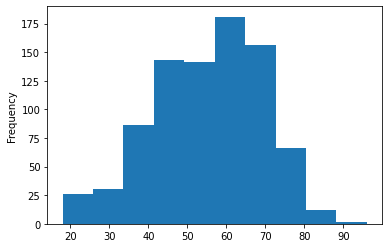

In [62]:
#After removing outliers
df['Age'].plot(kind='hist')
plt.show()

In [63]:
dfbk=df.copy()

In [65]:
#impute age using KNNimputer
from sklearn.impute import KNNImputer
age_impute=df[['BI_RADS','Age','Severity']]
imputer=KNNImputer(n_neighbors=5)
newage=imputer.fit_transform(age_impute)
newage=pd.DataFrame(newage)
new_age=newage.loc[:,1]



In [74]:
df=df.drop('Age',axis=1)
df['Age']=new_age


In [76]:
df.head(5)

,BI_RADS,Shape,Margin,Mass_Density,Severity,Age
0,5.0,lobular,spiculated,low,1,67.0
1,4.0,round,circumscribed,NaN,1,43.0
2,5.0,irregular,spiculated,low,1,58.0
3,4.0,round,circumscribed,low,0,28.0
4,5.0,round,spiculated,NaN,1,74.0


Categorical feature imputation and encoding 

In [78]:
import numpy as np
from fancyimpute import KNN
from sklearn.preprocessing import  OrdinalEncoder

In [79]:
 encoder=OrdinalEncoder()
 imputer=KNN()
 cat_cols=['Shape','Margin','Mass_Density']
 def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data



In [82]:
for columns in cat_cols:
    df[columns]=encode(df[columns])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [84]:
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)

Imputing row 1/961 with 0 missing, elapsed time: 0.158
Imputing row 101/961 with 2 missing, elapsed time: 0.160
Imputing row 201/961 with 0 missing, elapsed time: 0.161
Imputing row 301/961 with 0 missing, elapsed time: 0.162
Imputing row 401/961 with 0 missing, elapsed time: 0.163
Imputing row 501/961 with 0 missing, elapsed time: 0.164
Imputing row 601/961 with 0 missing, elapsed time: 0.165
Imputing row 701/961 with 0 missing, elapsed time: 0.166
Imputing row 801/961 with 0 missing, elapsed time: 0.167
Imputing row 901/961 with 0 missing, elapsed time: 0.167


In [88]:
encode_data.isnull().sum()


BI_RADS         0
Shape           0
Margin          0
Mass_Density    0
Severity        0
Age             0
dtype: int64

In [89]:
encode_data.head(5)

,BI_RADS,Shape,Margin,Mass_Density,Severity,Age
0,5.0,1.0,4.0,3.0,1.0,67.0
1,4.0,3.0,0.0,3.0,1.0,43.0
2,5.0,0.0,4.0,3.0,1.0,58.0
3,4.0,3.0,0.0,3.0,0.0,28.0
4,5.0,3.0,4.0,3.0,1.0,74.0


In [90]:
data=encode_data[['BI_RADS','Age','Shape','Margin','Mass_Density','Severity']]

In [92]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

train test data split

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Apply simple logistic model 

Testing Accuracy : 0.8290155440414507
Training Accuracy : 0.83984375
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       107
         1.0       0.78      0.85      0.82        86

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193



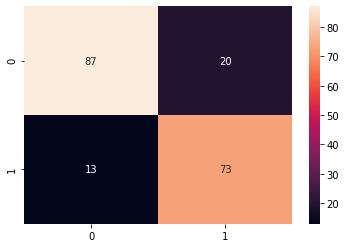

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Testing Accuracy :", model.score(x_test, y_test))
print("Training Accuracy :", model.score(x_train, y_train))

# confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

# classification report
cr = classification_report(y_pred, y_test)
print(cr)

In [ ]:
#For Simple Logistic model the accuracy on test data is 82.9 % ,which looks good and also F1 score and recall value is quite fine.